In [212]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3191a879-19e5-447a-82fa-80e3cc715215',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [213]:
type(data)

dict

In [214]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [215]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11714,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19757868.000,19757868.000,False,NaN,1,NaN,NaN,None,2024-09-23T13:38:00.000Z,63255.281,29682983660.376,93.218,-0.279,0.946,8.738,-1.537,-1.397,3.621,1249789487088.089,56.292,1328360895459.460,None,2024-09-23T13:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
1,1027,Ethereum,ETH,ethereum,9339,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120349723.936,120349723.936,True,NaN,2,NaN,NaN,None,2024-09-23T13:37:00.000Z,2642.480,17909060420.197,58.255,-0.235,2.642,15.424,-4.365,-16.010,-21.438,318021689194.691,14.336,318021689194.690,None,2024-09-23T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
2,825,Tether USDt,USDT,tether,98334,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119162238140.344,121386817751.615,True,NaN,3,NaN,NaN,None,2024-09-23T13:37:00.000Z,1.000,56286972664.712,58.734,0.040,0.027,0.043,-0.004,0.063,0.093,119203354963.712,5.369,121428702164.180,None,2024-09-23T13:37:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-23 20:38:51.291369
3,1839,BNB,BNB,bnb,2239,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145933481.861,145933481.861,False,NaN,4,NaN,NaN,None,2024-09-23T13:37:00.000Z,594.624,1894879544.879,24.476,0.122,2.523,9.063,2.157,6.159,4.014,86775573503.547,3.909,86775573503.550,None,2024-09-23T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
4,5426,Solana,SOL,solana,738,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468613638.571,585073786.925,True,NaN,5,NaN,NaN,None,2024-09-23T13:37:00.000Z,143.302,2183106167.530,55.229,0.053,-0.293,9.016,-9.251,-14.458,4.901,67153165956.306,3.025,83842111872.490,None,2024-09-23T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
5,3408,USDC,USDC,usd-coin,22166,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35948578198.244,35948578198.244,False,NaN,6,NaN,NaN,None,2024-09-23T13:37:00.000Z,1.000,5610026363.664,106.777,0.013,0.015,0.024,0.017,0.015,0.013,35953487507.569,1.621,35953487507.570,None,2024-09-23T13:37:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-23 20:38:51.291369
6,52,XRP,XRP,xrp,1392,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000,56434507880.000,99987205428.000,False,NaN,7,NaN,NaN,None,2024-09-23T13:38:00.000Z,0.586,986817351.867,-13.227,-0.281,-0.555,2.867,-6.184,-4.178,23.162,33043322755.719,1.488,58551627358.890,None,2024-09-23T13:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
7,74,Dogecoin,DOGE,dogecoin,1070,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146075926383.705,146075926383.705,True,NaN,8,NaN,NaN,None,2024-09-23T13:37:00.000Z,0.106,612135026.998,16.833,-0.211,0.068,5.568,-5.258,-14.007,-13.675,15548737256.219,0.700,15548737256.220,None,2024-09-23T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
8,11419,Toncoin,TON,toncoin,563,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2532751923.653,5112211504.281,True,NaN,9,3414166606.000,19307086588.098,None,2024-09-23

In [216]:
import os
#Save Original File to CSV
if not os.path.isfile(r"C:\Users\thean\Python_DataAnalyst\CyptoAPI_file.csv"):
    df.to_csv(r"C:\Users\thean\Python_DataAnalyst\CyptoAPI_file.csv",mode = 'w', header = True)
else:
    df.to_csv(r"C:\Users\thean\Python_DataAnalyst\CyptoAPI_file.csv", mode = 'a', header = False)

In [217]:
df_work = pd.read_csv(r"C:\Users\thean\Python_DataAnalyst\CyptoAPI_file.csv", header = 0)
df_work

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000,19756534.000,19756534.000,False,NaN,1,NaN,NaN,NaN,2024-09-20T09:44:00.000Z,63540.818,42131549866.170,-10.491,0.399,1.980,9.314,7.286,-5.629,-1.085,1255346329915.492,56.837,1334357176629.530,NaN,2024-09-20T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:46:41.458809
1,1,1027,Ethereum,ETH,ethereum,9332,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120345932.993,120345932.993,True,NaN,2,NaN,NaN,NaN,2024-09-20T09:43:00.000Z,2548.374,19809351117.158,-7.225,0.087,4.631,8.228,-1.119,-26.848,-26.897,306686404647.673,13.880,306686404647.670,NaN,2024-09-20T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:46:41.458809
2,2,825,Tether USDt,USDT,tether,98053,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119072842113.356,121386817751.624,True,NaN,3,NaN,NaN,NaN,2024-09-20T09:43:00.000Z,1.000,69547018887.694,-4.964,0.008,-0.008,0.019,0.005,0.012,0.070,119092036715.005,5.393,121406385367.300,NaN,2024-09-20T09:43:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-20 16:46:41.458809
3,3,1839,BNB,BNB,bnb,2237,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145933696.622,145933696.622,False,NaN,4,NaN,NaN,NaN,2024-09-20T09:43:00.000Z,572.728,1947433427.618,8.668,0.361,2.840,5.654,3.127,-3.587,-2.304,83580255236.089,3.785,83580255236.090,NaN,2024-09-20T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:46:41.458809
4,4,5426,Solana,SOL,solana,737,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,468491512.589,584920036.235,True,NaN,5,NaN,NaN,NaN,2024-09-20T09:43:00.000Z,151.022,3330305052.146,11.350,0.111,8.660,12.668,6.751,-15.440,12.559,70752500898.947,3.203,88335763354.220,NaN,2024-09-20T09:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:46:41.458809
5,5,3408,USDC,USDC,usd-coin,22145,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35540278648.199,35540278648.199,False,NaN,6,NaN,NaN,NaN,2024-09-20T09:43:00.000Z,1.000,6953697911.869,-14.509,0.012,-0.002,0.004,0.015,0.004,0.005,35541892491.440,1.609,35541892491.440,NaN,2024-09-20T09:43:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-20 16:46:41.458809
6,6,52,XRP,XRP,xrp,1391,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000,56434507880.000,99987205428.000,False,NaN,7,NaN,NaN,NaN,2024-09-20T09:44:00.000Z,0.589,1332939203.417,5.842,-0.014,0.989,4.193,-1.291,-2.228,21.477,33220455563.955,1.504,58865500580.950,NaN,2024-09-20T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:46:41.458809
7,7,74,Dogecoin,DOGE,dogecoin,1067,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146032876383.705,146032876383.705,True,NaN,8,NaN,NaN,NaN,2024-09-20T09:44:00.000Z,0.107,663399026.011,-0.699,0.664,2.483,1.582,3.094,-22.132,-13.413,15616969352.027,0.707,15616969352.030,NaN,2024-09-20T09:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:46:41.458809
8,8,11419,Toncoin,TON,toncoin,558,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2532622952.821,5112077206.558,True,NaN,9,3414166606.000,19684050651.157,NaN,20

In [218]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11714,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19757868.000,19757868.000,False,NaN,1,NaN,NaN,None,2024-09-23T13:38:00.000Z,63255.281,29682983660.376,93.218,-0.279,0.946,8.738,-1.537,-1.397,3.621,1249789487088.089,56.292,1328360895459.460,None,2024-09-23T13:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
1,1027,Ethereum,ETH,ethereum,9339,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120349723.936,120349723.936,True,NaN,2,NaN,NaN,None,2024-09-23T13:37:00.000Z,2642.480,17909060420.197,58.255,-0.235,2.642,15.424,-4.365,-16.010,-21.438,318021689194.691,14.336,318021689194.690,None,2024-09-23T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
2,825,Tether USDt,USDT,tether,98334,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119162238140.344,121386817751.615,True,NaN,3,NaN,NaN,None,2024-09-23T13:37:00.000Z,1.000,56286972664.712,58.734,0.040,0.027,0.043,-0.004,0.063,0.093,119203354963.712,5.369,121428702164.180,None,2024-09-23T13:37:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-23 20:38:51.291369
3,1839,BNB,BNB,bnb,2239,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145933481.861,145933481.861,False,NaN,4,NaN,NaN,None,2024-09-23T13:37:00.000Z,594.624,1894879544.879,24.476,0.122,2.523,9.063,2.157,6.159,4.014,86775573503.547,3.909,86775573503.550,None,2024-09-23T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
4,5426,Solana,SOL,solana,738,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468613638.571,585073786.925,True,NaN,5,NaN,NaN,None,2024-09-23T13:37:00.000Z,143.302,2183106167.530,55.229,0.053,-0.293,9.016,-9.251,-14.458,4.901,67153165956.306,3.025,83842111872.490,None,2024-09-23T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
5,3408,USDC,USDC,usd-coin,22166,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35948578198.244,35948578198.244,False,NaN,6,NaN,NaN,None,2024-09-23T13:37:00.000Z,1.000,5610026363.664,106.777,0.013,0.015,0.024,0.017,0.015,0.013,35953487507.569,1.621,35953487507.570,None,2024-09-23T13:37:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-23 20:38:51.291369
6,52,XRP,XRP,xrp,1392,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000,56434507880.000,99987205428.000,False,NaN,7,NaN,NaN,None,2024-09-23T13:38:00.000Z,0.586,986817351.867,-13.227,-0.281,-0.555,2.867,-6.184,-4.178,23.162,33043322755.719,1.488,58551627358.890,None,2024-09-23T13:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
7,74,Dogecoin,DOGE,dogecoin,1070,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146075926383.705,146075926383.705,True,NaN,8,NaN,NaN,None,2024-09-23T13:37:00.000Z,0.106,612135026.998,16.833,-0.211,0.068,5.568,-5.258,-14.007,-13.675,15548737256.219,0.700,15548737256.220,None,2024-09-23T13:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-23 20:38:51.291369
8,11419,Toncoin,TON,toncoin,563,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2532751923.653,5112211504.281,True,NaN,9,3414166606.000,19307086588.098,None,2024-09-23

In [219]:
dfGroupByName = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
dfGroupByName

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.279,0.946,8.738,-1.537,-1.397,3.621
Ethereum,-0.235,2.642,15.424,-4.365,-16.010,-21.438
Tether USDt,0.040,0.027,0.043,-0.004,0.063,0.093
BNB,0.122,2.523,9.063,2.157,6.159,4.014
Solana,0.053,-0.293,9.016,-9.251,-14.458,4.901
USDC,0.013,0.015,0.024,0.017,0.015,0.013
XRP,-0.281,-0.555,2.867,-6.184,-4.178,23.162
Dogecoin,-0.211,0.068,5.568,-5.258,-14.007,-13.675
Toncoin,0.173,1.596,3.457,-16.612,-13.485,-25.486


In [220]:
dfGroupByName.stack()

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.279
              quote.USD.percent_change_24h     0.946
              quote.USD.percent_change_7d      8.738
              quote.USD.percent_change_30d    -1.537
              quote.USD.percent_change_60d    -1.397
              quote.USD.percent_change_90d     3.621
Ethereum      quote.USD.percent_change_1h     -0.235
              quote.USD.percent_change_24h     2.642
              quote.USD.percent_change_7d     15.424
              quote.USD.percent_change_30d    -4.365
              quote.USD.percent_change_60d   -16.010
              quote.USD.percent_change_90d   -21.438
Tether USDt   quote.USD.percent_change_1h      0.040
              quote.USD.percent_change_24h     0.027
              quote.USD.percent_change_7d      0.043
              quote.USD.percent_change_30d    -0.004
              quote.USD.percent_change_60d     0.063
              quote.USD.percent_change_90d     0.093
BNB

In [221]:
df1 = dfGroupByName.reset_index()
df1

,name,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
0,Bitcoin,-0.279,0.946,8.738,-1.537,-1.397,3.621
1,Ethereum,-0.235,2.642,15.424,-4.365,-16.010,-21.438
2,Tether USDt,0.040,0.027,0.043,-0.004,0.063,0.093
3,BNB,0.122,2.523,9.063,2.157,6.159,4.014
4,Solana,0.053,-0.293,9.016,-9.251,-14.458,4.901
5,USDC,0.013,0.015,0.024,0.017,0.015,0.013
6,XRP,-0.281,-0.555,2.867,-6.184,-4.178,23.162
7,Dogecoin,-0.211,0.068,5.568,-5.258,-14.007,-13.675
8,Toncoin,0.173,1.596,3.457,-16.612,-13.485,-25.486
9,TRON,0.001,0.828,2.177,-4.174,12.652,25.290


In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
df2 = df1.melt(id_vars=['name'], 
                    value_vars=['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                                'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
                    var_name='Time_Period', value_name='Percent_Change')
df2

,name,Time_Period,Percent_Change
0,Bitcoin,quote.USD.percent_change_1h,-0.279
1,Ethereum,quote.USD.percent_change_1h,-0.235
2,Tether USDt,quote.USD.percent_change_1h,0.040
3,BNB,quote.USD.percent_change_1h,0.122
4,Solana,quote.USD.percent_change_1h,0.053
5,USDC,quote.USD.percent_change_1h,0.013
6,XRP,quote.USD.percent_change_1h,-0.281
7,Dogecoin,quote.USD.percent_change_1h,-0.211
8,Toncoin,quote.USD.percent_change_1h,0.173
9,TRON,quote.USD.percent_change_1h,0.001


In [224]:
df2['Time_Period'] = df2['Time_Period'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                                'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])
df2

,name,Time_Period,Percent_Change
0,Bitcoin,1h,-0.279
1,Ethereum,1h,-0.235
2,Tether USDt,1h,0.040
3,BNB,1h,0.122
4,Solana,1h,0.053
5,USDC,1h,0.013
6,XRP,1h,-0.281
7,Dogecoin,1h,-0.211
8,Toncoin,1h,0.173
9,TRON,1h,0.001


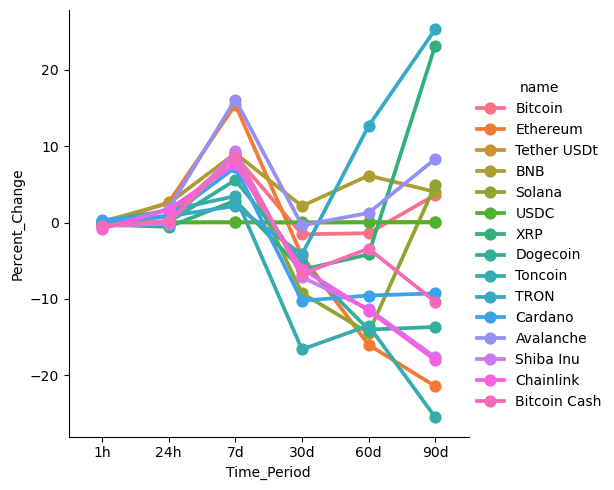

In [225]:
sns.catplot(x='Time_Period', y='Percent_Change', hue='name', data=df2, kind='point')

In [226]:
df5 = df[['name','quote.USD.price','timestamp']]
df5

,name,quote.USD.price,timestamp
0,Bitcoin,63255.281,2024-09-23 20:38:51.291369
1,Ethereum,2642.480,2024-09-23 20:38:51.291369
2,Tether USDt,1.000,2024-09-23 20:38:51.291369
3,BNB,594.624,2024-09-23 20:38:51.291369
4,Solana,143.302,2024-09-23 20:38:51.291369
5,USDC,1.000,2024-09-23 20:38:51.291369
6,XRP,0.586,2024-09-23 20:38:51.291369
7,Dogecoin,0.106,2024-09-23 20:38:51.291369
8,Toncoin,5.655,2024-09-23 20:38:51.291369
9,TRON,0.153,2024-09-23 20:38:51.291369


In [246]:
df5.query("name=='Bitcoin'")

,name,quote.USD.price,timestamp
0,Bitcoin,63255.281,2024-09-23 20:38:51.291369


In [250]:
df10 = df[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63255.281,2024-09-23 20:38:51.291369
1,Ethereum,2642.480,2024-09-23 20:38:51.291369
2,Tether USDt,1.000,2024-09-23 20:38:51.291369
3,BNB,594.624,2024-09-23 20:38:51.291369
4,Solana,143.302,2024-09-23 20:38:51.291369
5,USDC,1.000,2024-09-23 20:38:51.291369
6,XRP,0.586,2024-09-23 20:38:51.291369
7,Dogecoin,0.106,2024-09-23 20:38:51.291369
8,Toncoin,5.655,2024-09-23 20:38:51.291369
9,TRON,0.153,2024-09-23 20:38:51.291369
